In [8]:
# 1. Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("karachi_aqi (1).csv", parse_dates=["time"])
df.sort_values("time", inplace=True)
df.set_index("time", inplace=True)

# Preview
display(df.head())
df.info()
df.describe()


,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,temperature_2m,relative_humidity_2m,wind_speed_10m,precipitation
time,,,,,,,,,,,
2025-05-01 00:00:00,22.2,15.8,255.0,14.3,8.4,67.0,56,28.8,66,12.1,0.0
2025-05-01 01:00:00,21.7,15.3,204.0,11.5,7.7,69.0,56,28.4,68,12.0,0.0
2025-05-01 02:00:00,21.2,14.6,169.0,9.1,7.2,71.0,55,28.2,70,12.3,0.0
2025-05-01 03:00:00,20.7,13.9,156.0,7.3,6.8,73.0,55,27.9,71,12.4,0.0
2025-05-01 04:00:00,20.4,13.4,158.0,6.0,6.4,74.0,56,27.9,71,13.5,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1896 entries, 2025-05-01 00:00:00 to 2025-07-19 23:00:00
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pm10                  1896 non-null   float64
 1   pm2_5                 1896 non-null   float64
 2   carbon_monoxide       1896 non-null   float64
 3   nitrogen_dioxide      1896 non-null   float64
 4   sulphur_dioxide       1896 non-null   float64
 5   ozone                 1896 non-null   float64
 6   us_aqi                1896 non-null   int64  
 7   temperature_2m        1896 non-null   float64
 8   relative_humidity_2m  1896 non-null   int64  
 9   wind_speed_10m        1896 non-null   float64
 10  precipitation         1896 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 177.8 KB


,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,temperature_2m,relative_humidity_2m,wind_speed_10m,precipitation
count,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000
mean,71.668987,26.224420,271.538502,12.238238,13.210654,69.233650,80.402954,30.313555,75.286392,13.329483,0.039188
std,43.128747,8.572803,108.102495,8.281806,5.044661,28.447716,13.690976,1.902167,11.297593,4.441570,0.424263
min,10.300000,9.400000,115.000000,2.400000,5.000000,12.000000,55.000000,26.400000,24.000000,0.700000,0.000000
25%,46.700000,20.500000,207.000000,6.000000,9.700000,48.000000,70.000000,28.900000,67.000000,10.400000,0.000000
50%,63.600000,24.700000,251.000000,9.900000,12.500000,63.000000,79.000000,29.800000,78.000000,13.600000,0.000000
75%,85.700000,30.000000,310.000000,16.400000,15.300000,87.000000,90.000000,31.700000,84.000000,16.200000,0.000000
max,385.600000,73.600000,1100.000000,66.900000,42.100000,190.000000,140.000000,38.300000,98.000000,26.900000,10.400000


### Dataset Summary and Descriptive Statistics

#### Dataset Overview
- The dataset contains **1896 hourly observations** from **May 1, 2025 to July 19, 2025**.
- It includes **11 features**, all numerical, representing a mix of **pollution indicators** (e.g. `pm2_5`, `ozone`) and **meteorological data** (e.g. `temperature_2m`, `wind_speed_10m`).
- There are **no missing values**, which is ideal for modeling.
- Datatypes are appropriately assigned:
  - All pollutant and weather variables are `float64`
  - AQI (`us_aqi`) and humidity are stored as `int64`


#### Descriptive Statistics Highlights

| Feature              | Insight |
|----------------------|---------|
| `pm10`, `pm2_5`      | Mean values ~72 and ~26 respectively; **right-skewed** distributions with potential outliers (e.g., `pm10` max is **385.6**). |
| `carbon_monoxide`    | Extremely wide range from **115 to 1100**; likely needs transformation due to skew. |
| `ozone`              | Mean ~69, ranging from **12 to 190** — high variance, and may significantly influence AQI. |
| `us_aqi` (target)    | Values range from **55 to 140**, mean of **80.4** — indicating most readings fall in the **Moderate to Unhealthy** category. |
| `temperature_2m`     | Fairly stable, ranging from **26.4°C to 38.3°C**, mean of **30.3°C** — slight right skew. |
| `relative_humidity_2m` | Range: **24% to 98%**, average ~75% — slightly left-skewed. |
| `wind_speed_10m`     | Average of **13.3 m/s** with outliers reaching up to **26.9 m/s**. |
| `precipitation`      | Almost all values are **0.0**, with occasional spikes — may be better used as a binary feature (e.g. "rainy or not"). |


#### Observations
- **Outliers** are present in several features, especially `pm10`, `carbon_monoxide`, and `ozone`.
- **Skewed distributions** suggest the need for transformation (log or winsorization) before training.
- **`us_aqi` is a good candidate** for regression modeling given its range and completeness.
- `precipitation` has minimal variation and may not contribute much as-is — consider converting it to a categorical or binary flag.

This summary supports early preprocessing steps and guides the selection of useful predictive features.


In [9]:
# 2. Missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])


Missing values per column:
Series([], dtype: int64)


No missing values


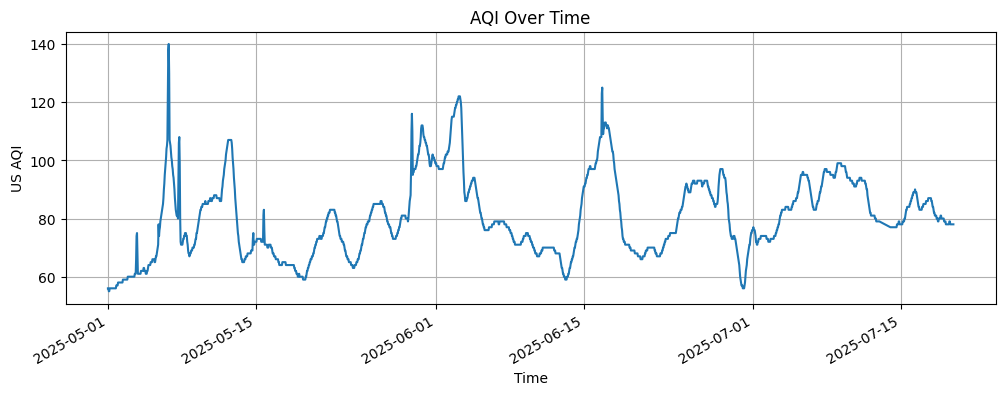

In [10]:
# 3. Time-Series Plot of AQI
df['us_aqi'].plot(figsize=(12,4), title="AQI Over Time")
plt.xlabel("Time")
plt.ylabel("US AQI")
plt.grid(True)
plt.show()


### AQI Over Time (May–July 2025)

The line plot above illustrates the **hourly trend of US AQI** (Air Quality Index) in Karachi from **May 1 to July 19, 2025**.

#### Key Observations:
- The AQI values fluctuate between **~55 to 140**, with the majority of values falling in the **Moderate to Unhealthy** range.
- **Sharp spikes** in AQI are observed around **early May**, **mid-June**, and **late June** — likely caused by specific pollution events (e.g., traffic congestion, dust storms, or industrial activity).
- **Recurring peaks and valleys** suggest the presence of **short-term periodic behavior**, making time-based features like `hour`, `day`, and `month` potentially valuable predictors.
- AQI shows a somewhat **stationary behavior** overall, with fluctuations around a baseline of ~80.



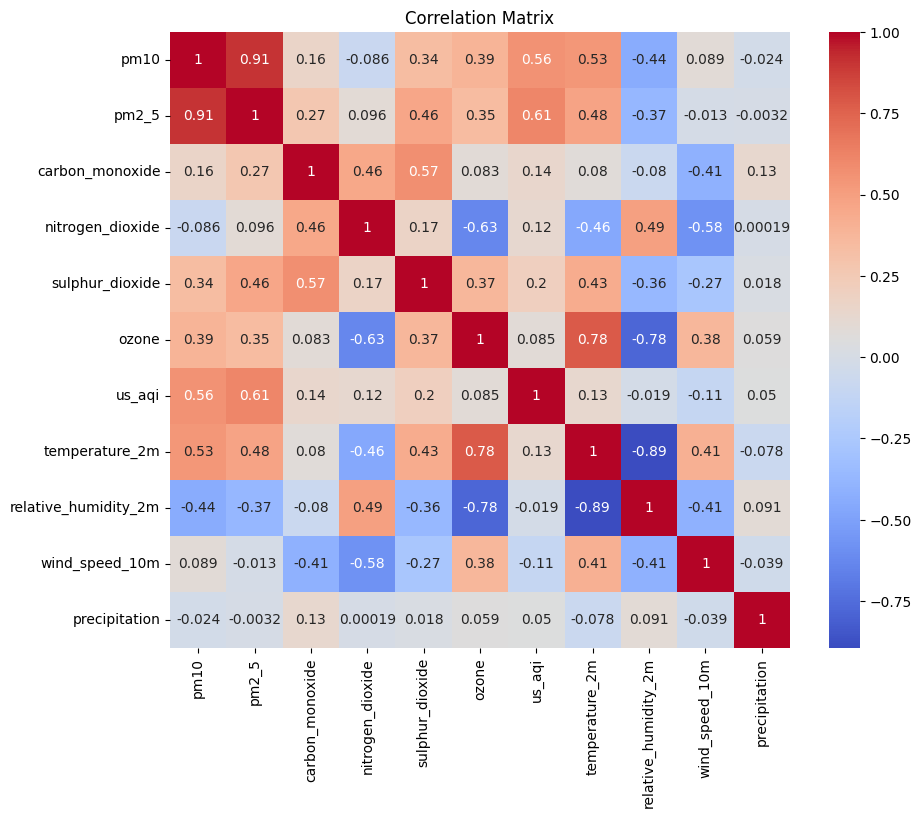

In [11]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Correlation Matrix Insights

The correlation matrix visualizes the **pairwise relationships** between all features in the dataset using Pearson correlation coefficients.

#### Key Insights:

- **Strong Positive Correlations:**
  - `pm10` and `pm2_5`: **0.91** — both are particulate matter pollutants and naturally co-occur.
  - `us_aqi` with `pm2_5` (**0.61**) and `pm10` (**0.56**) — confirms these as major contributors to air quality degradation.
  - `temperature_2m` and `ozone`: **0.78** — ozone formation increases with temperature, typical in photochemical smog.

- **Strong Negative Correlations:**
  - `relative_humidity_2m` and `temperature_2m`: **−0.89** — expected inverse relationship in atmospheric conditions.
  - `relative_humidity_2m` and `ozone`: **−0.78** — high humidity may suppress ozone levels.

- **Moderate Correlations:**
  - `sulphur_dioxide` with `carbon_monoxide` (**0.57**) and `pm2_5` (**0.46**)
  - `ozone` has mild positive correlation with `pm10`, `pm2_5`, and `temperature_2m`, but strong negative with `nitrogen_dioxide`.

- **Weak or No Correlation:**
  - `precipitation` has very weak correlations with all variables — suggesting it may not be a strong predictor.
  - `wind_speed_10m` has weak or negative correlation with most pollutants, though may still help as a **lag feature** (e.g., dispersing pollutants).


#### Implications for Modeling:

- Use `pm2_5`, `pm10`, and `ozone` as strong predictors for `us_aqi`.
- Address **multicollinearity** between `pm10` and `pm2_5` via regularization (e.g., Lasso), PCA, or feature selection.
- Consider dropping or transforming features with very low correlation to the target (e.g., `precipitation`) unless domain logic supports otherwise.
- Strong negative correlations (e.g. humidity vs ozone) may be leveraged to improve model interpretability.

This correlation matrix guides both **feature selection** and **engineering** decisions for AQI prediction models.


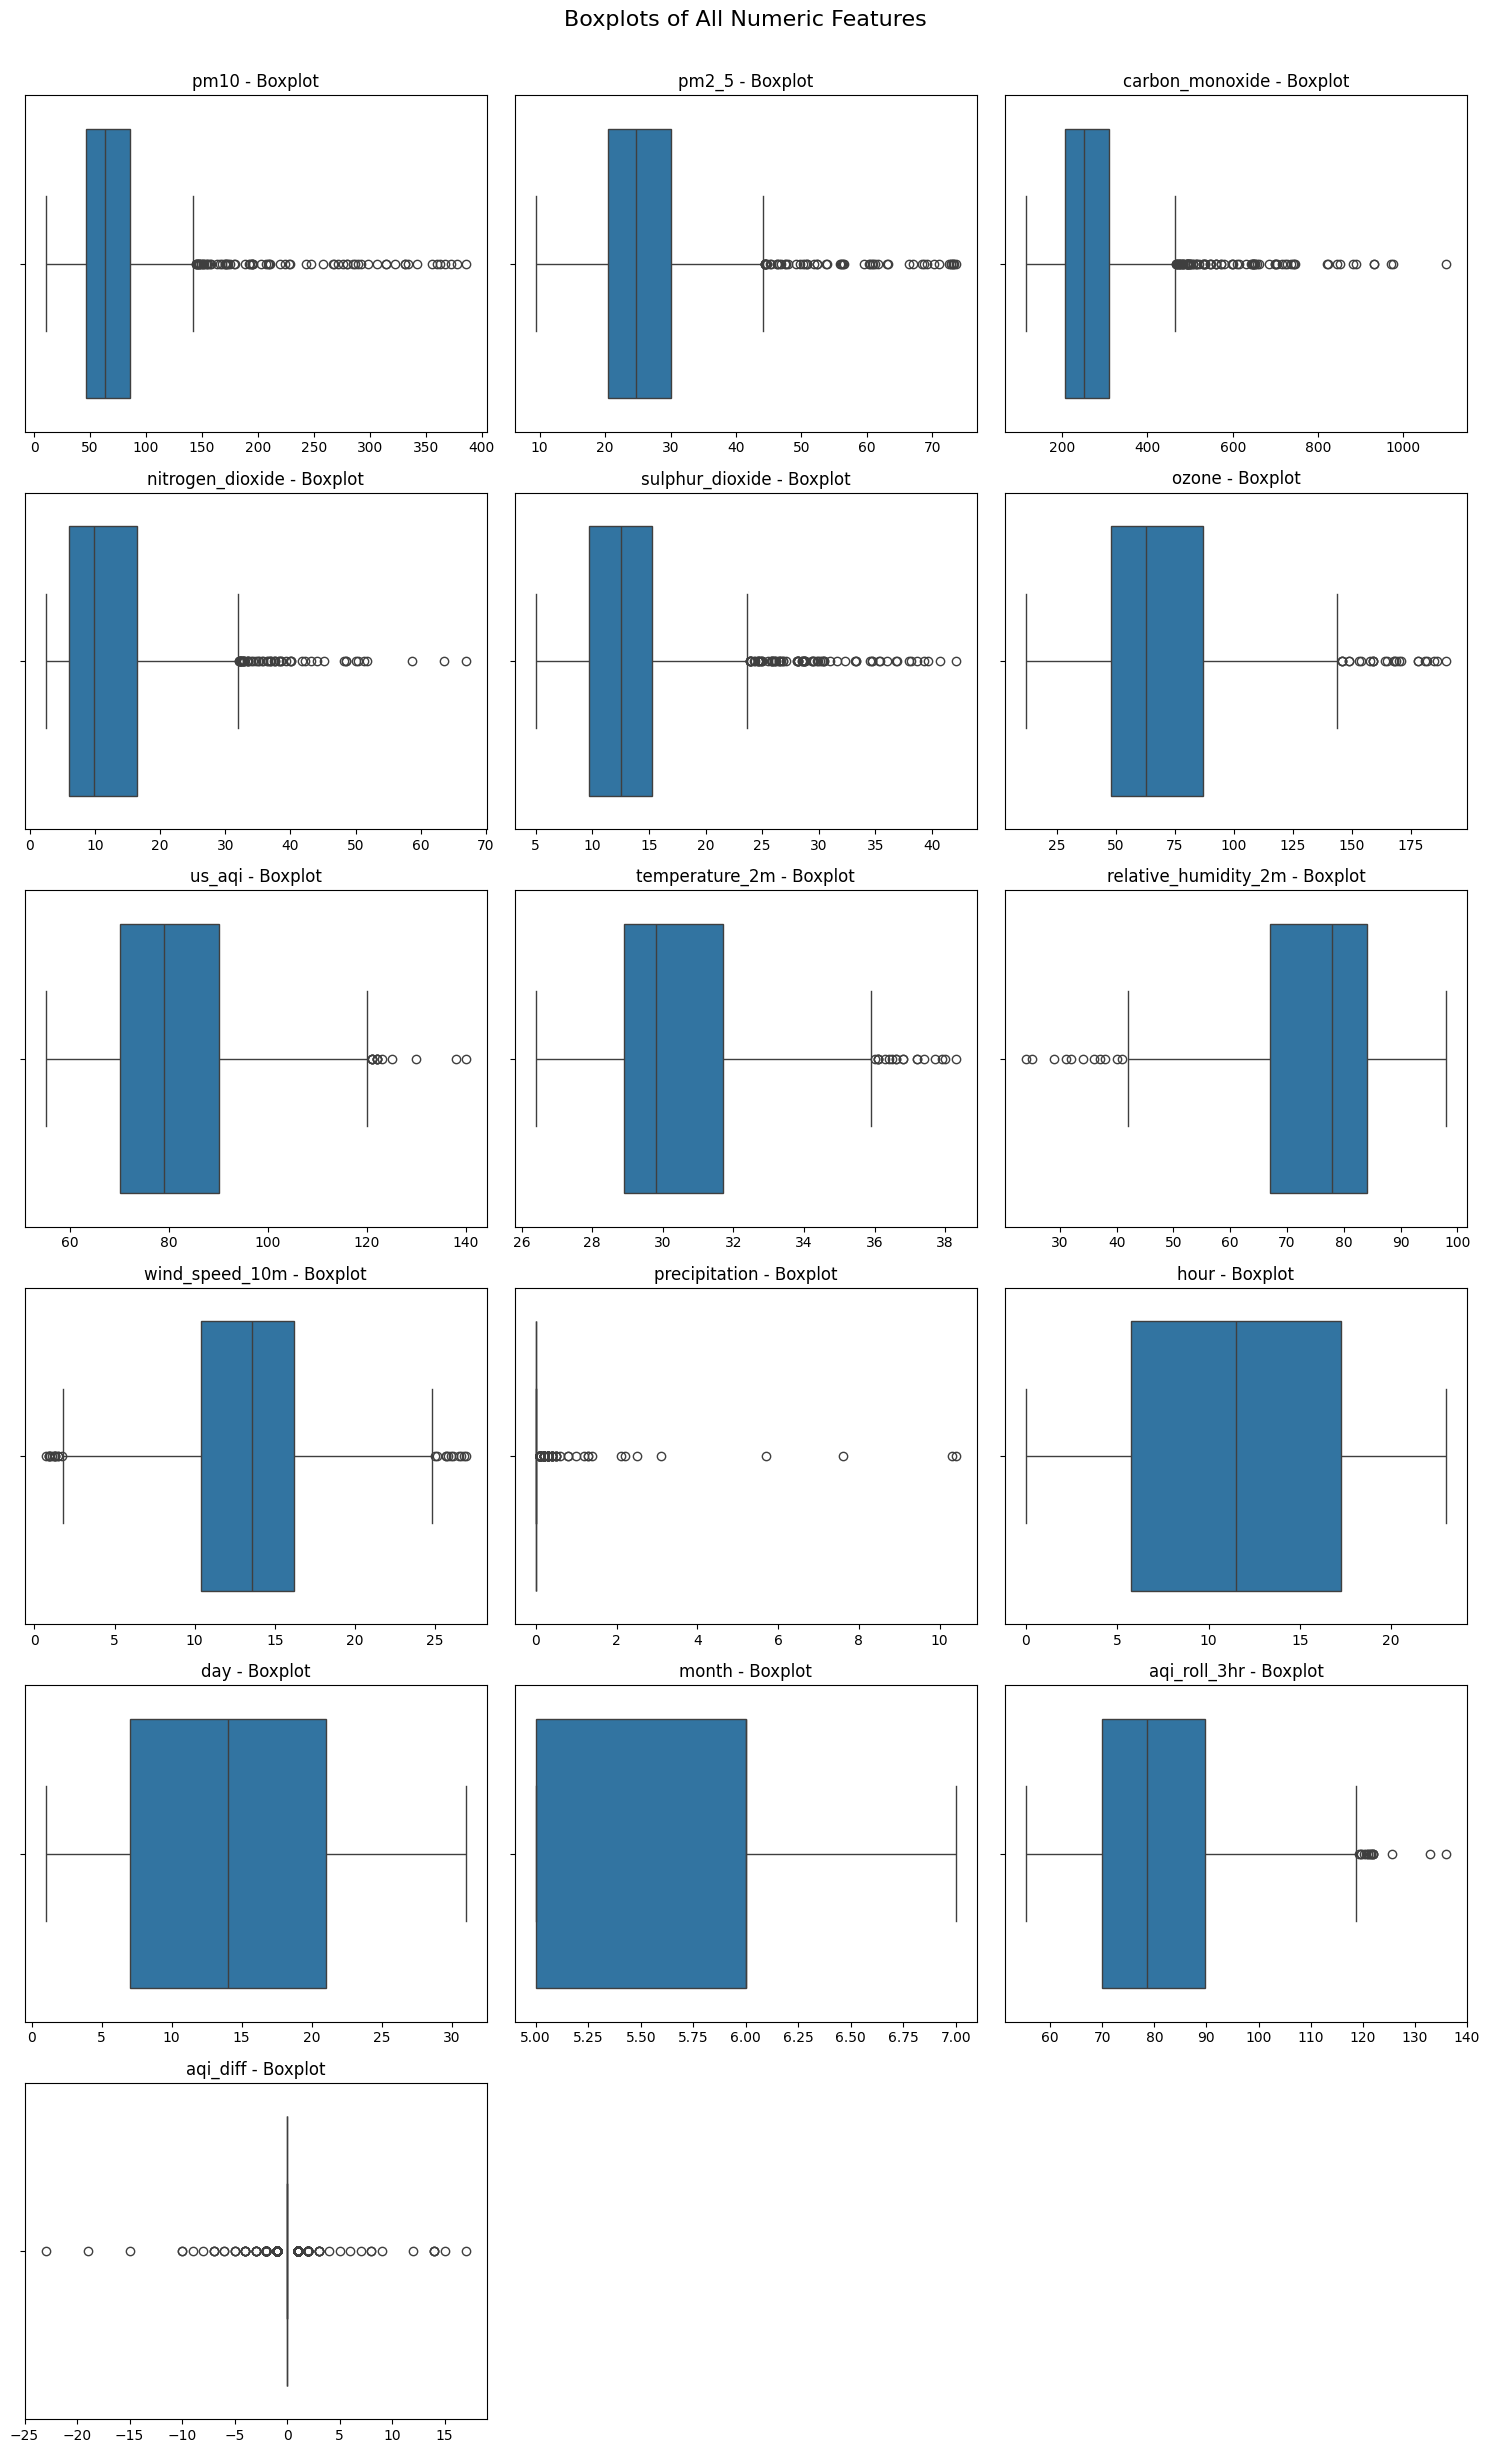

In [21]:
import math
# Get all numeric features
numeric_cols = df.select_dtypes(include='number').columns

# Determine layout based on number of features
n_cols = 3
n_features = len(numeric_cols)
n_rows = math.ceil(n_features / n_cols)

# Plot boxplots
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.xlabel("")
    plt.tight_layout()

plt.suptitle("Boxplots of All Numeric Features", fontsize=16, y=1.02)
plt.show()

### Outlier Detection (Boxplots)

Boxplots were generated for all numeric features to visualize outliers.

- **Severe right-skew and outliers** found in:
  - `carbon_monoxide`, `pm10`, `pm2_5`, `ozone`, `sulphur_dioxide`, `nitrogen_dioxide`
  - These have multiple extreme points far beyond the whiskers, suggesting potential pollution spikes.
- **Mild outliers** in:
  - `temperature_2m`, `us_aqi`, `relative_humidity_2m`, and `wind_speed_10m`
- **Minimal or no outliers** in:
  - `hour`, `day`, `month` — as expected since these are discrete time features
  - `precipitation` is heavily zero-biased with a few high rain events
- **Engineered features** like `aqi_diff` and `aqi_roll_3hr` show natural fluctuations but with visible outliers too.

#### Next Steps:
- Consider **log-transforming** highly skewed pollutant features.
- Outliers can be **clipped** (e.g. at 99th percentile) to stabilize learning for sensitive models.
- Retain extreme values if they represent **real pollution events** critical for AQI forecasting.


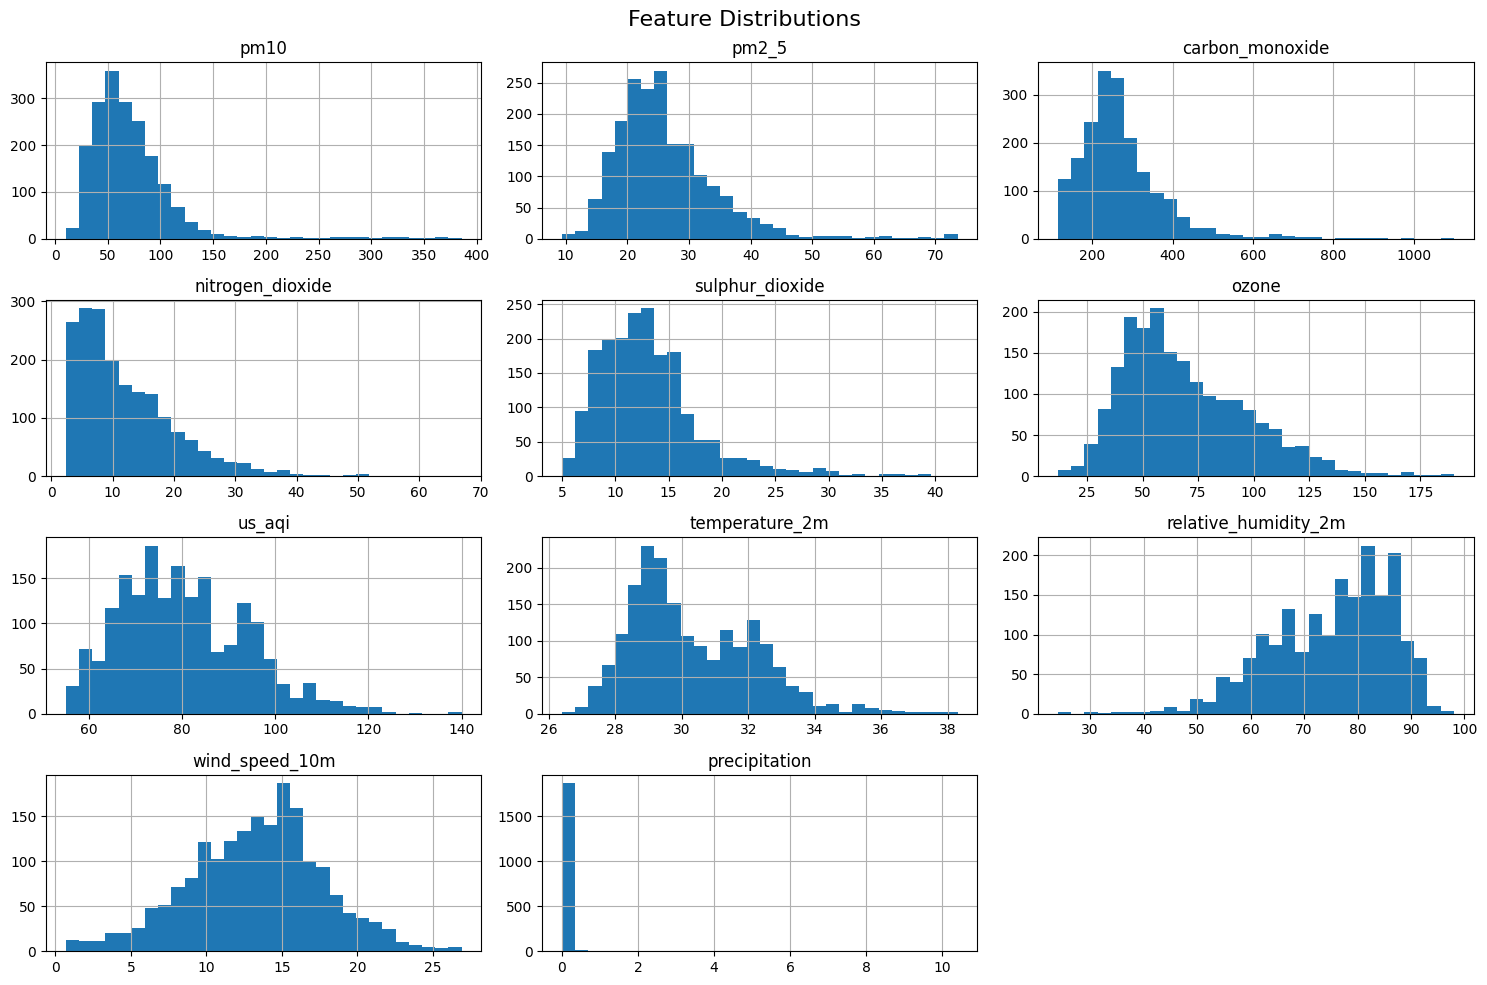

In [12]:
# 5. Distributions and Outliers
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


### Feature Distributions Summary

- Most pollutants (`pm10`, `pm2_5`, `carbon_monoxide`, etc.) are **right-skewed** with a few high outliers → consider **log transformation**.
- `us_aqi` is moderately skewed and mostly falls between **60–100**, with a few spikes near **140**.
- `temperature_2m` and `wind_speed_10m` are fairly **normally distributed**.
- `relative_humidity_2m` is **left-skewed**, peaking around **75–90%**.
- `precipitation` is **zero-heavy** — best treated as a **binary feature** (rain vs no rain).

**Next Steps**:
- Apply transformations to reduce skew.
- Consider outlier handling for pollutants.
- Scale features before training sensitive models (e.g., SVM, KNN).


In [16]:
df.skew(numeric_only=True)


pm10                     3.195892
pm2_5                    1.807463
carbon_monoxide          2.252190
nitrogen_dioxide         1.598915
sulphur_dioxide          1.720413
ozone                    0.865970
us_aqi                   0.592707
temperature_2m           0.815063
relative_humidity_2m    -0.702946
wind_speed_10m          -0.119570
precipitation           19.918754
hour                     0.000000
day                      0.207743
month                    0.290767
aqi_roll_3hr             0.570435
aqi_diff                -1.046699
dtype: float64

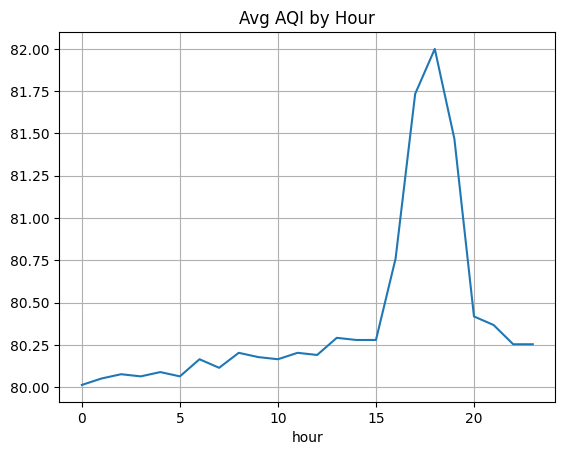

In [13]:
# 6. Feature Engineering Ideas from Time
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month

# AQI by hour of day
df.groupby('hour')['us_aqi'].mean().plot(kind='line', title="Avg AQI by Hour")
plt.grid(True)
plt.show()


### Average AQI by Hour

This line plot shows the average AQI across each hour of the day.

- AQI remains relatively stable (~80) throughout most of the day.
- A **sharp spike occurs between 17:00 and 19:00 (5–7 PM)**, likely due to evening traffic or industrial activity.
- This confirms that **`hour` is an important temporal feature** and should be included in the model.


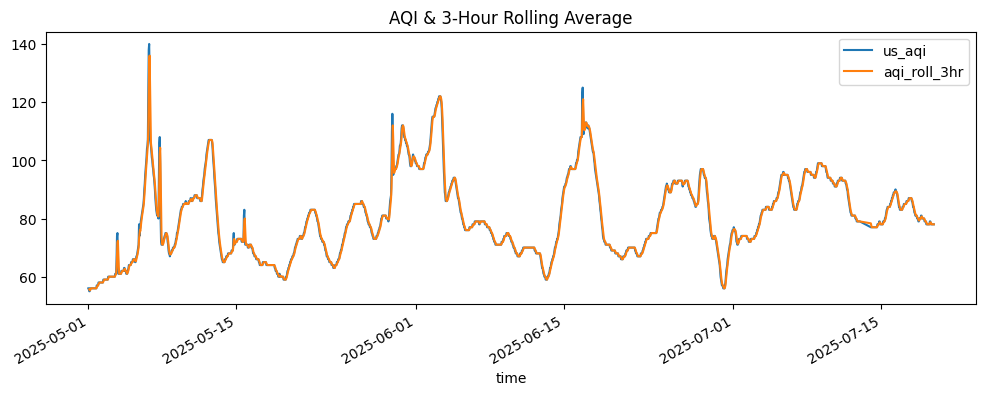

In [14]:
# 7. Rolling Averages & Lag Features (Optional)
df["aqi_roll_3hr"] = df["us_aqi"].rolling(3).mean()
df["aqi_diff"] = df["us_aqi"].diff()

# Plot rolling average
df[["us_aqi", "aqi_roll_3hr"]].plot(figsize=(12,4), title="AQI & 3-Hour Rolling Average")
plt.show()


### AQI & 3-Hour Rolling Average

This plot compares the original `us_aqi` values with a 3-hour rolling average (`aqi_roll_3hr`).

#### Key Insights:
- The rolling average **smooths out short-term noise** while preserving overall trends.
- Sharp AQI spikes are visible in raw data but are softened in the rolling version.
- Useful for capturing **underlying pollution patterns** without overreacting to hourly fluctuations.

#### Action:
Include `aqi_roll_3hr` as a feature to help models learn smoothed trends and avoid overfitting to noise.
